### Dissertation Title: Artificial Intelligence supporting early detection and diagnosis in heart failure management.

### Goal: To develop a machine, ensembled method and artificial intelligence or deep learning algorithm to detect and predict the presence or absence (accuracy) of cardiovascular disease (heart failure) based on the other variables

### Cardiovascular disease (Heart Failure)

With an estimated 840,768 deaths in 2016, cardiovascular disease is the top cause of mortality in the United States. However, almost 200,000 fatalities each year may be prevented with modest lifestyle changes and screening. Using only standard health information, we will examine different machine learning approaches for detecting the presence of cardiovascular disease. We use both traditional machine learning and state-of-the-art deep learning techniques.

The machine learning techniques include a Random Forest classifier, Logistic Regression, Linear support vector machine (SVM), adaboost classifier, bagging, decision tree classifier. For our deep learning technique, we also use a multilayer preceptron neural network for this cardiovascular disease detection

In addition to utilising these methods to diagnose cardiovascular disease, we will explore which data features are most indicative for the disease. With  nearly 70,000 patients, our dataset contains standard health information as well as information on the presence or absence of cardiovascular disease. Our goal here is not only to develop a classifier to detect the existence of cardiovascular disease, but also to discover which aspects and types of data (demographic, examination, and social history) are most beneficial for disease prediction. With the findings of this study, physicians may be able to modify their existing case history procedures in order to gather more valuable data from their patients.

### Dataset

The cardiovascular disease dataset is an open-source dataset produced by Svetlana Ulianova in canada and uploaded on Kaggle in the year 2018. The data set consists of 70,000 patient records (34,979 with cardiovascular disease and 35,021 without) and includes 11 characteristics (4 demographic, 4 examination, and 3 social history  and also our target variable which is cardio.
>1. The age (age) of the patient which is demographic (	int)(days)
>2. Weight (weight) of the patient which is demographic (float) (kg)
>3. Height (height) of the patient which is demographic (int)(cm)
>4. The gender (gender) of the person which is demographic (categorical code)(Binary) which is 1 or 2, where 1 is women and 2 is men
>5. Systolic blood pressure (api_hi) is the highest level of blood pressure, mainly the medical examination (int)
>6. Diastolic blood pressure (api_lo) is the lowest level of blood pressure mainly the medical examination (int)
>7. Cholesterol (cholesterol) is a kind of fat mainly the medical examination where 1: normal, 2: above normal, 3: well above normal, which is a categorical code (int)
>8. Glucose (gluc) is a kind of sugamainly ther mainly the medical examination where 1: normal, 2: above normal, 3: well above normal, which is a categorical code (int)
>9. Smoking (smoke) which is the smoking history of the patient (binary)
>10. Alcohol (alco) intake which is the alcohol intake of the patient which is the social history (binary)
>11. Physical activity (active) which is the activity of the patient. It describes whether the patient is or active or not, It also refers to the social history of the patients. (Binary)
>12. Cardio which is the presence or absence of the diseases (Binary)


Some features are numerical, while others are assigned categorical codes, and  others have binary values. Although the classes are balanced, more female patients were seen than male patients. Furthermore, the continuous-valued features are almost normally distributed; nevertheless, the some of the categorical values are skewed, when will address all in our analysis


In [1]:
#Importing the libraries

import pandas as pd
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
from itertools import product
import warnings
from pandas.core.common import SettingWithCopyWarning
warnings.simplefilter(action="ignore", category=SettingWithCopyWarning)

##Data transformation,spilting and model building
from sklearn.model_selection import train_test_split,cross_val_score,KFold,cross_val_predict,GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.dummy import DummyClassifier
from sklearn.model_selection import RandomizedSearchCV

from sklearn.preprocessing import RobustScaler, label_binarize

from sklearn.tree import DecisionTreeClassifier, export_graphviz
import graphviz
from sklearn.linear_model import LogisticRegressionCV
from sklearn.preprocessing import MinMaxScaler, LabelEncoder, StandardScaler, RobustScaler

from sklearn.ensemble import BaggingClassifier, RandomForestClassifier, AdaBoostClassifier, GradientBoostingClassifier
from sklearn.svm import LinearSVC, SVC
from sklearn.neural_network import MLPClassifier

###Evaluation
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, \
    roc_auc_score, confusion_matrix, classification_report, plot_roc_curve

from sklearn.metrics import jaccard_score, adjusted_rand_score, silhouette_score, calinski_harabasz_score, roc_curve, auc, accuracy_score, classification_report, confusion_matrix
from sklearn.metrics.cluster import contingency_matrix



### What is Binary Classification?

Binary classification is a supervised machine learning technique where the goal is to predict categorical class labels which are discrete and unoredered such as Yes or No, Positive or Negative etc. A few real world use cases for classification are listed below:

>1. Medical testing to determine if a patient has a certain disease or not - the classification property is the presence of the disease.


### Data Preparation

In [2]:
###reading the data into python
df= pd.read_csv('C:/Users/spant/Desktop/Dissertation/Dissertation/cardio.csv', sep=';') 

###first row of the data
df.head()

,id,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio
0,0,18393,2,168,62.0,110,80,1,1,0,0,1,0
1,1,20228,1,156,85.0,140,90,3,1,0,0,1,1
2,2,18857,1,165,64.0,130,70,3,1,0,0,0,1
3,3,17623,2,169,82.0,150,100,1,1,0,0,1,1
4,4,17474,1,156,56.0,100,60,1,1,0,0,0,0


In [3]:
df.describe()


,id,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio
count,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000
mean,49972.419900,19468.865814,1.349571,164.359229,74.205690,128.817286,96.630414,1.366871,1.226457,0.088129,0.053771,0.803729,0.499700
std,28851.302323,2467.251667,0.476838,8.210126,14.395757,154.011419,188.472530,0.680250,0.572270,0.283484,0.225568,0.397179,0.500003
min,0.000000,10798.000000,1.000000,55.000000,10.000000,-150.000000,-70.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000
25%,25006.750000,17664.000000,1.000000,159.000000,65.000000,120.000000,80.000000,1.000000,1.000000,0.000000,0.000000,1.000000,0.000000
50%,50001.500000,19703.000000,1.000000,165.000000,72.000000,120.000000,80.000000,1.000000,1.000000,0.000000,0.000000,1.000000,0.000000
75%,74889.250000,21327.000000,2.000000,170.000000,82.000000,140.000000,90.000000,2.000000,1.000000,0.000000,0.000000,1.000000,1.000000
max,99999.000000,23713.000000,2.000000,250.000000,200.000000,16020.000000,11000.000000,3.000000,3.000000,1.000000,1.000000,1.000000,1.000000


We infer that certain data features are binary or ordinal, while others are continuous, based on an initial statistical overview of the dataset. Furthermore, some variables, such as systolic and diastolic blood pressure (ap hi and ap lo), have unrealistic minimum and maximum values. This indicates that there are outliers in the data.

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 70000 entries, 0 to 69999
Data columns (total 13 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   id           70000 non-null  int64  
 1   age          70000 non-null  int64  
 2   gender       70000 non-null  int64  
 3   height       70000 non-null  int64  
 4   weight       70000 non-null  float64
 5   ap_hi        70000 non-null  int64  
 6   ap_lo        70000 non-null  int64  
 7   cholesterol  70000 non-null  int64  
 8   gluc         70000 non-null  int64  
 9   smoke        70000 non-null  int64  
 10  alco         70000 non-null  int64  
 11  active       70000 non-null  int64  
 12  cardio       70000 non-null  int64  
dtypes: float64(1), int64(12)
memory usage: 6.9 MB


There are no null values in this dataset, and all data values are either ints or floats.

In [5]:
# check distribution of target variable
df.cardio.value_counts()




0    35021
1    34979
Name: cardio, dtype: int64

In this dataset, 35,021 of the 70,000 patients are classified as having no cardiovascular disease, whereas 34,979 are classified as having cardiovascular disease. This indicates that the data is fairly balanced.

### Exploratory Data Analysis

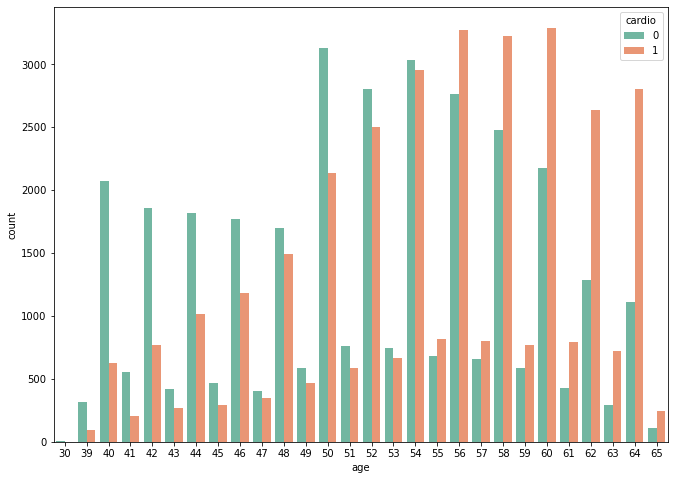

In [6]:
###Univariate Analysis of numerical values

####We will then convert age to years and plot the diagram

from matplotlib import rcParams
rcParams['figure.figsize'] = 11, 8

###We will convert age from days to years 
df['age'] = (df['age'] / 365).round().astype('int')
sns.countplot(x='age', hue='cardio', data = df, palette="Set2");


It can be observed that people over 55 of age are more exposed to Cardiovascular Disease(Heart Failure). From the table above, we can see that there are outliers in ap_hi, ap_lo, weight and height. We will deal with them in data cleaning.

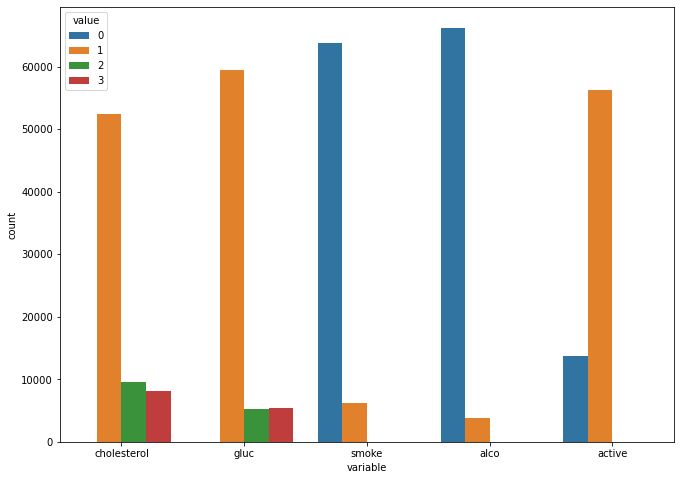

In [7]:
### Univariate Analysis for cholesterol, gluc, smoke, alco and active

df_1 = df.loc[:,['cholesterol','gluc', 'smoke', 'alco', 'active']]
sns.countplot(x="variable", hue="value",data= pd.melt(df_1));

Alcohol intake had the highest frequency

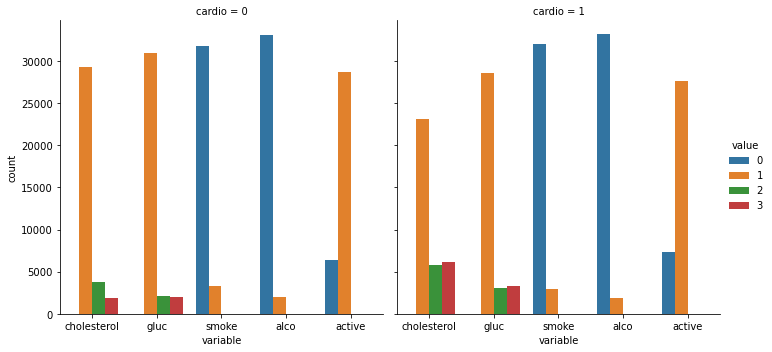

In [8]:
####Bivariate Analysis

###It may be useful to split categorical variables by target class

df_long = pd.melt(df, id_vars=['cardio'], value_vars=['cholesterol','gluc', 'smoke', 'alco', 'active'])
sns.catplot(x="variable", hue="value", col="cardio",
                data=df_long, kind="count");


It can be clearly seen that patients with CVD have higher cholesterol and blood glucose level. Moreover they are less active.
Let us calculate the mean height per gender to see if "1" in the gender column refers to women or men. We presume that men are, on average, taller than women.

In [9]:
df.groupby('gender')['height'].mean()

gender
1    161.355612
2    169.947895
Name: height, dtype: float64

Moreover, the average height for the "2" gender is greater than that of the "1" gender, "1" represents women. Let's look at how many males and women are represented in the dataset.

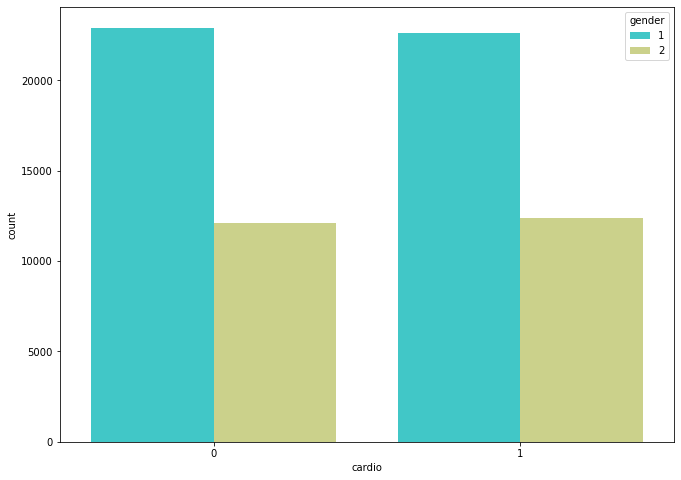

In [10]:
# visualize cardio with gender where 1 is women and 2 is male
sns.countplot(x='cardio',data=df,hue='gender',palette='rainbow')

In [11]:
df['gender'].value_counts()

1    45530
2    24470
Name: gender, dtype: int64

In [12]:
#Who more often report consuming alcohol - men or women?
df.groupby('gender')['alco'].sum()



gender
1    1161
2    2603
Name: alco, dtype: int64

Therefore, men consume alcohol more frequently on average. Next, the target variables are balanced

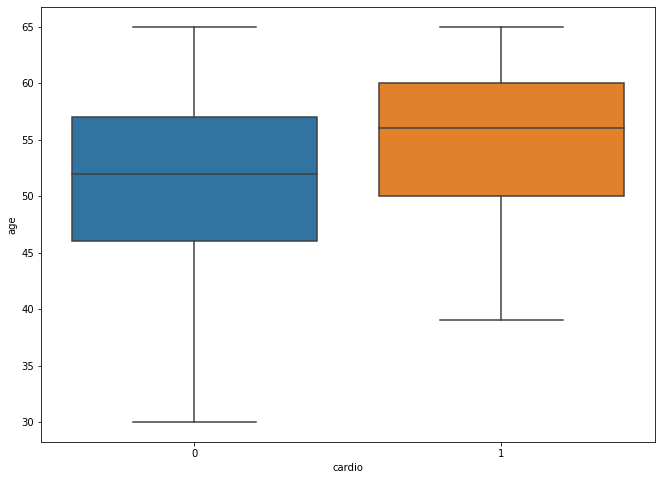

In [13]:
# distribution of cardio with age
sns.boxplot(x='cardio',y='age',data=df)

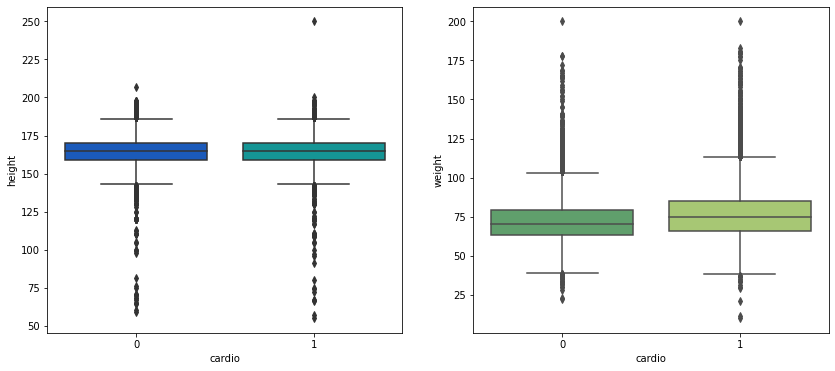

In [14]:
#Cardio with height and weight

plt.figure(figsize=(14,6))
plt.subplot(1,2,1)
sns.boxplot(x='cardio',y='height',data=df,palette='winter')
plt.subplot(1,2,2)
sns.boxplot(x='cardio',y='weight',data=df,palette='summer')

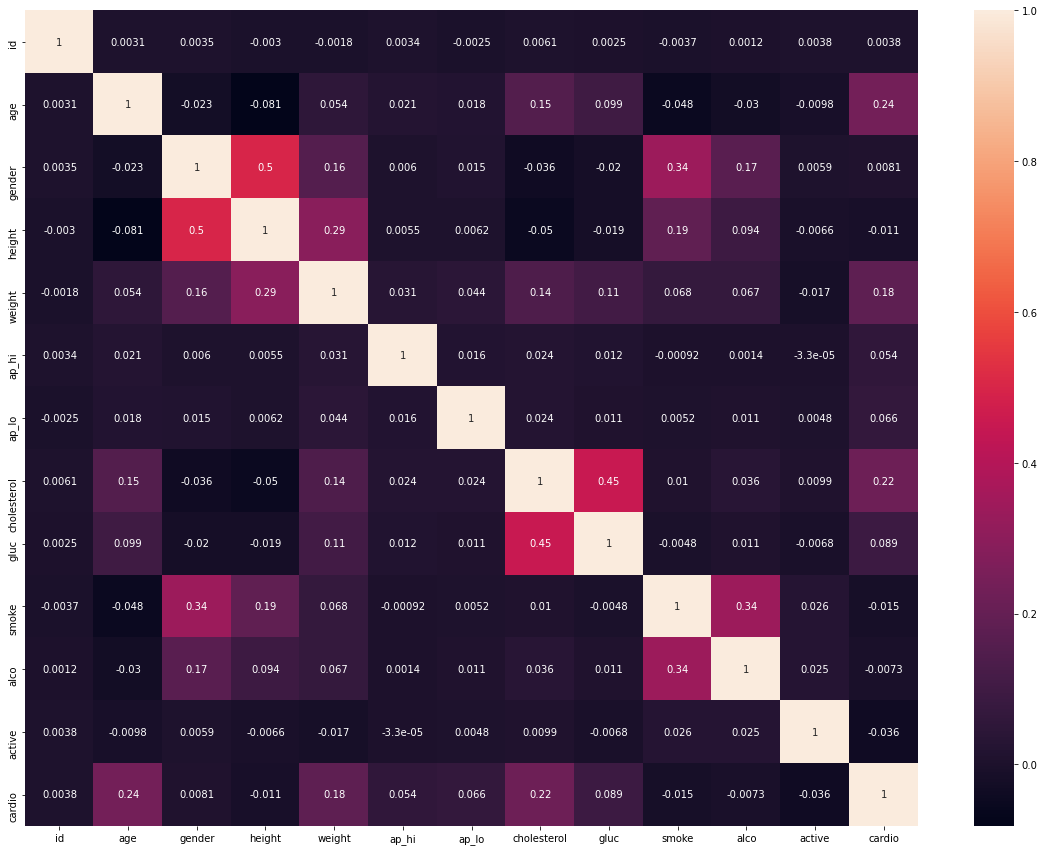

In [15]:
#Multivariate Analysis
#It might be useful to consider correlation matrix:
# check correlations
plt.subplots(figsize=(20,15))
sns.heatmap(df.corr(), annot=True)

A heatmap shows the correlations between the dataset's variables.We can observe from the heatmap that no features directly connect with the label (cardio) and that there are no significant correlations between other variables in general. However, there are correlations between a few variables:
>1. A score of 0.5 is correlated to height and gender.
>2. A score of 0.45 is correlated with glucose and cholesterol.
>3. A score of 0.34 is correlated with smoking habits and alco.

### Data Preprocessing and Cleaning

In [16]:
df.head()


,id,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio
0,0,50,2,168,62.0,110,80,1,1,0,0,1,0
1,1,55,1,156,85.0,140,90,3,1,0,0,1,1
2,2,52,1,165,64.0,130,70,3,1,0,0,0,1
3,3,48,2,169,82.0,150,100,1,1,0,0,1,1
4,4,48,1,156,56.0,100,60,1,1,0,0,0,0


In [17]:
#### we will remove id 
df = df.drop('id', axis=1)

In [18]:
df.head()

,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio
0,50,2,168,62.0,110,80,1,1,0,0,1,0
1,55,1,156,85.0,140,90,3,1,0,0,1,1
2,52,1,165,64.0,130,70,3,1,0,0,0,1
3,48,2,169,82.0,150,100,1,1,0,0,1,1
4,48,1,156,56.0,100,60,1,1,0,0,0,0


We converted age into years because it was in days during the plotting of the age graph

In [19]:
#we will check for duplication
df.duplicated().sum()

3816

In [20]:
#We will delete duplicated values
df.drop_duplicates(inplace=True) 

In [21]:
#we will check for duplication again
df.duplicated().sum()

0

Duplicated values have been deleted

### Outliers detection 

In [22]:
###Adjust thresholds and check the outliers
def outlier_thresholds(dataframe, col_name, q1=0.10, q3=0.90):
    quartile1 = dataframe[col_name].quantile(q1)
    quartile3 = dataframe[col_name].quantile(q3)
    interquantile_range = quartile3 - quartile1
    up_limit = quartile3 + 1.5 * interquantile_range
    low_limit = quartile1 - 1.5 * interquantile_range
    return low_limit, up_limit

In [23]:
def check_outlier(dataframe, col_name, q1=0.10, q3=0.90):
    low_limit, up_limit = outlier_thresholds(dataframe, col_name, q1, q3)
    if dataframe[(dataframe[col_name] > up_limit) | (dataframe[col_name] < low_limit)].any(axis=None):
        return True
    else:
        return False

In [24]:
#### We were able to separate the variables in the data set as categorical and numerical.

def grab_col_names(dataframe, cat_th=10, car_th=20):
    # cat_cols, cat_but_car
    cat_cols = [col for col in dataframe.columns if dataframe[col].dtypes == "O"]
    num_but_cat = [col for col in dataframe.columns if dataframe[col].nunique() < cat_th and
                   dataframe[col].dtypes != "O"]
    cat_but_car = [col for col in dataframe.columns if dataframe[col].nunique() > car_th and
                   dataframe[col].dtypes == "O"]
    cat_cols = cat_cols + num_but_cat
    cat_cols = [col for col in cat_cols if col not in cat_but_car]

    # num_cols
    num_cols = [col for col in dataframe.columns if dataframe[col].dtypes != "O"]
    num_cols = [col for col in num_cols if col not in num_but_cat]

    print(f"Observations: {dataframe.shape[0]}")
    print(f"Variables: {dataframe.shape[1]}")
    print(f'cat_cols: {len(cat_cols)}')
    print(f'num_cols: {len(num_cols)}')
    print(f'cat_but_car: {len(cat_but_car)}')
    print(f'num_but_cat: {len(num_but_cat)}')
    return cat_cols, num_cols, cat_but_car

We will now check which feature has an outlier

In [25]:
cat_cols, num_cols, cat_but_car = grab_col_names(df)

for col in num_cols:
    print(col, check_outlier(df, col))

Observations: 66184
Variables: 12
cat_cols: 7
num_cols: 5
cat_but_car: 0
num_but_cat: 7
age False
height True
weight True
ap_hi True
ap_lo True


In [26]:
####Replacing outliers with upper and lower limit
def replace_with_thresholds(dataframe, variable):
    low_limit, up_limit = outlier_thresholds(dataframe, variable)
    dataframe.loc[(dataframe[variable] < low_limit), variable] = low_limit
    dataframe.loc[(dataframe[variable] > up_limit), variable] = up_limit

In [27]:
for col in num_cols:
    replace_with_thresholds(df, col)

In [28]:
####We have cleaned and check for outliers

for col in num_cols:
    print(col, check_outlier(df, col))

age False
height False
weight False
ap_hi False
ap_lo False


In [29]:
df.isnull().values.any()

False

In [30]:
df.head()

,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio
0,50.0,2,168.0,62.0,110.0,80.0,1,1,0,0,1,0
1,55.0,1,156.0,85.0,140.0,90.0,3,1,0,0,1,1
2,52.0,1,165.0,64.0,130.0,70.0,3,1,0,0,0,1
3,48.0,2,169.0,82.0,150.0,100.0,1,1,0,0,1,1
4,48.0,1,156.0,56.0,100.0,60.0,1,1,0,0,0,0


In [31]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 66184 entries, 0 to 69999
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   age          66184 non-null  float64
 1   gender       66184 non-null  int64  
 2   height       66184 non-null  float64
 3   weight       66184 non-null  float64
 4   ap_hi        66184 non-null  float64
 5   ap_lo        66184 non-null  float64
 6   cholesterol  66184 non-null  int64  
 7   gluc         66184 non-null  int64  
 8   smoke        66184 non-null  int64  
 9   alco         66184 non-null  int64  
 10  active       66184 non-null  int64  
 11  cardio       66184 non-null  int64  
dtypes: float64(5), int64(7)
memory usage: 6.6 MB


### Feature Engineering


In [32]:
# For age colummn

df.loc[(df["age"] < 18), "new_age"] = "Young"
df.loc[(df["age"] > 18) & (df["age"] < 56), "new_age"] = "Mature"
df.loc[(df["age"] >= 56), "new_age"] = "Old"

### BMI = weight(kg)/height(m2)
We will create a new feature - Body Mass Index (BMI):




In [33]:

###Calculating for body mass index
cols1 = df["weight"]
cols2 = df["height"] / 100

In [34]:
####Body mass index
df["bmi"] = (cols1) / (cols2)**2

In [35]:
df.head()

,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio,new_age,bmi
0,50.0,2,168.0,62.0,110.0,80.0,1,1,0,0,1,0,Mature,21.967120
1,55.0,1,156.0,85.0,140.0,90.0,3,1,0,0,1,1,Mature,34.927679
2,52.0,1,165.0,64.0,130.0,70.0,3,1,0,0,0,1,Mature,23.507805
3,48.0,2,169.0,82.0,150.0,100.0,1,1,0,0,1,1,Mature,28.710479
4,48.0,1,156.0,56.0,100.0,60.0,1,1,0,0,0,0,Mature,23.011177


In [36]:
####Creating a column to check for obesity

df.loc[(df["bmi"] < 18.5), "new_bmi"] = "under"
df.loc[(df["bmi"] >= 18.5) & (df["bmi"] <= 24.99) ,"new_bmi"] = "healthy"
df.loc[(df["bmi"] >= 25) & (df["bmi"] <= 29.99) ,"new_bmi"]= "over"
df.loc[(df["bmi"] >= 30), "new_bmi"] = "obese"

In [37]:
df.head()

,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio,new_age,bmi,new_bmi
0,50.0,2,168.0,62.0,110.0,80.0,1,1,0,0,1,0,Mature,21.967120,healthy
1,55.0,1,156.0,85.0,140.0,90.0,3,1,0,0,1,1,Mature,34.927679,obese
2,52.0,1,165.0,64.0,130.0,70.0,3,1,0,0,0,1,Mature,23.507805,healthy
3,48.0,2,169.0,82.0,150.0,100.0,1,1,0,0,1,1,Mature,28.710479,over
4,48.0,1,156.0,56.0,100.0,60.0,1,1,0,0,0,0,Mature,23.011177,healthy


In [38]:
df["ap_hi"].max()

210.0

In [39]:
####Creating a column to check for blood pressure

df.loc[(df["ap_lo"])<=89, "BLOOD_PRESSURE"] = "normal"
df.loc[(df["ap_lo"])>=90, "BLOOD_PRESSURE"] = "hyper"
df.loc[(df["ap_hi"])<=120, "BLOOD_PRESSURE"] = "normal"
df.loc[(df["ap_hi"])>120, "BLOOD_PRESSURE"] = "normal"
df.loc[(df["ap_hi"])>=140, "BLOOD_PRESSURE"] = "hyper"

If Diastolic blood pressure(ap_lo) is less or equal to 89 then is normal, if is greater of equal to 90 then is hyper
If systolic blood pressure is (ap_hi) is less or equal to 120 then is normal, if is greater than 120 is normal but if is higher than 140 then it can lead to hypertension


In [40]:
df.head()

,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio,new_age,bmi,new_bmi,BLOOD_PRESSURE
0,50.0,2,168.0,62.0,110.0,80.0,1,1,0,0,1,0,Mature,21.967120,healthy,normal
1,55.0,1,156.0,85.0,140.0,90.0,3,1,0,0,1,1,Mature,34.927679,obese,hyper
2,52.0,1,165.0,64.0,130.0,70.0,3,1,0,0,0,1,Mature,23.507805,healthy,normal
3,48.0,2,169.0,82.0,150.0,100.0,1,1,0,0,1,1,Mature,28.710479,over,hyper
4,48.0,1,156.0,56.0,100.0,60.0,1,1,0,0,0,0,Mature,23.011177,healthy,normal


In [41]:
df.groupby('age')['cardio'].mean()



age
30.0    0.000000
39.0    0.223587
40.0    0.245656
41.0    0.276000
42.0    0.307661
43.0    0.390922
44.0    0.368653
45.0    0.387534
46.0    0.415450
47.0    0.469553
48.0    0.482442
49.0    0.454810
50.0    0.432858
51.0    0.449074
52.0    0.490347
53.0    0.483013
54.0    0.515556
55.0    0.551370
56.0    0.560014
57.0    0.556028
58.0    0.578336
59.0    0.573933
60.0    0.611598
61.0    0.651163
62.0    0.677649
63.0    0.718408
64.0    0.716754
65.0    0.683908
Name: cardio, dtype: float64

The higher the age the higher the likelehood of getting heart failure

In [42]:
df.groupby("smoke")["cardio"].mean()

smoke
0    0.517404
1    0.476547
Name: cardio, dtype: float64

In [43]:
####We will then save our csv file and perform PCA with it in R 

df.to_csv("cardio1.csv", index = False)

### Data Transformation & Train-Test Splitting

Label encoder can be used to normalize labels. It can also be used to transform non-numerical labels to numerical labels

In [44]:
##### Using the label encoder for data types object and unique values equal to 2
# label encoder
def label_encoder(dataframe, binary_col):
    labelencoder = LabelEncoder()
    dataframe[binary_col] = labelencoder.fit_transform(dataframe[binary_col].astype(str))
    return dataframe

binary_cols = [col for col in df.columns if df[col].dtypes == "O"
               and len(df[col].unique()) == 2]

for col in df.columns:
    label_encoder(df, col)

One hot encoding is one method of converting data to prepare it for an algorithm in order to get a better prediction

In [45]:
#####Using one-hot-encoder for categorical cols

def one_hot_encoder(dataframe, categorical_cols, drop_first=False):
    dataframe = pd.get_dummies(dataframe, columns=categorical_cols, drop_first=drop_first)
    return dataframe

ohe_cols = [col for col in df.columns if 10 >= len(df[col].unique()) > 2]

one_hot_encoder(df, ohe_cols, drop_first=True).head()

,age,gender,height,weight,ap_hi,ap_lo,smoke,alco,active,cardio,...,bmi,BLOOD_PRESSURE,cholesterol_1,cholesterol_2,gluc_1,gluc_2,new_bmi_1,new_bmi_2,new_bmi_3,new_bmi_4
0,12,1,41,130,10,51,0,0,1,0,...,705,1,0,0,0,0,0,0,0,0
1,17,0,29,228,40,61,0,0,1,1,...,2528,0,0,1,0,0,0,1,0,0
2,14,0,38,140,30,41,0,0,0,1,...,927,1,0,1,0,0,0,0,0,0
3,10,1,42,212,50,0,0,0,1,1,...,1716,0,0,0,0,0,0,0,1,0
4,10,0,29,107,0,31,0,0,0,0,...,854,1,0,0,0,0,0,0,0,0


In [46]:
#scaling the data
#Robust Scaler is used to robust the outliers

rs = RobustScaler()
df[num_cols] = rs.fit_transform(df[num_cols])

In [47]:
###Define the target variable and features, Split the data by train and test. Test size is 20% and train size is 80%

y = df["cardio"]
X = df.drop(["cardio"], axis=1)

X_train, X_test, y_train, y_test = train_test_split(X,
                                                    y,
                                                    test_size=0.20, random_state=1)

### Machine learning techniques
### Decision Tree


In [48]:
%%time

#####Building and tuning the model using Decision Tree

# parameters candidates
parameters = {'max_depth':range(2,32)}

# fitting
DecisionTree_GSCV = GridSearchCV(DecisionTreeClassifier(random_state=8017), 
                                 parameters, n_jobs=-1, verbose=3, return_train_score=True)
DecisionTree_GSCV.fit(X_train, y_train)
DecisionTree_model = DecisionTree_GSCV.best_estimator_

Fitting 5 folds for each of 30 candidates, totalling 150 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  16 tasks      | elapsed:    5.3s
[Parallel(n_jobs=-1)]: Done 112 tasks      | elapsed:   12.3s
[Parallel(n_jobs=-1)]: Done 150 out of 150 | elapsed:   15.9s finished


Wall time: 16.5 s


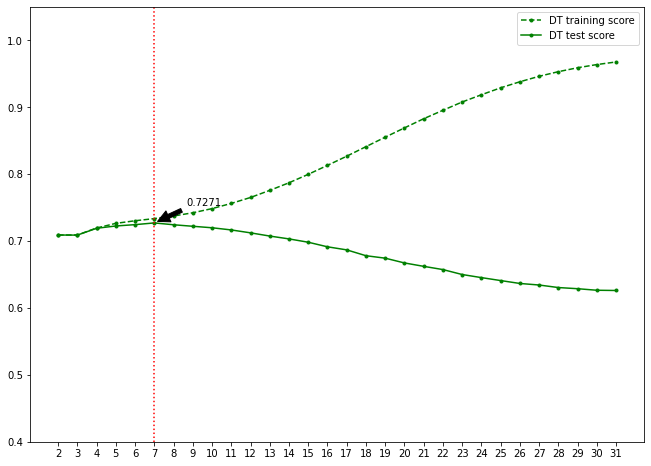

In [49]:
# plot training & testing scores
train_dt_scores = DecisionTree_GSCV.cv_results_['mean_train_score']
test_dt_scores = DecisionTree_GSCV.cv_results_['mean_test_score']

plt.plot(train_dt_scores, "g.--")
plt.plot(test_dt_scores, "g.-")
plt.ylim(0.4, 1.05)
plt.xticks(range(30), range(2, 32))
plt.legend(["DT training score", "DT test score"])
plt.axvline(np.argmax(test_dt_scores), linestyle="dotted", color="red")
plt.annotate(np.max(test_dt_scores).round(4), (np.argmax(test_dt_scores), np.max(test_dt_scores)), xycoords="data",
                 xytext=(50, 25), textcoords="offset pixels", arrowprops=dict(facecolor="black", shrink=0.1), fontsize=10,
                 horizontalalignment="center", verticalalignment="top")
plt.show()

In [50]:
# accuracy scores
print(DecisionTree_model.get_params())
print(f"Training Score: {round(DecisionTree_model.score(X_train, y_train),4)}")
print(f"Testing Score: {round(DecisionTree_model.score(X_test, y_test),4)}")

{'ccp_alpha': 0.0, 'class_weight': None, 'criterion': 'gini', 'max_depth': 7, 'max_features': None, 'max_leaf_nodes': None, 'min_impurity_decrease': 0.0, 'min_impurity_split': None, 'min_samples_leaf': 1, 'min_samples_split': 2, 'min_weight_fraction_leaf': 0.0, 'presort': 'deprecated', 'random_state': 8017, 'splitter': 'best'}
Training Score: 0.7331
Testing Score: 0.7241


In [51]:
# feature importances
d = {'feature importance':list(DecisionTree_model.feature_importances_)}
table = pd.DataFrame(d, index=X_train.columns)

display(  table.sort_values('feature importance', ascending=False)  )

,feature importance
BLOOD_PRESSURE,0.620187
age,0.115906
cholesterol,0.115312
ap_hi,0.099079
bmi,0.017713
gluc,0.009495
ap_lo,0.008468
height,0.005247
active,0.004024
weight,0.003159


Feature importance refers to methods for assigning a score to input features based on their usefulness in predicting a target variable.
We can see that Blood pressure had 0.62, which had greater influence in the model building

### Logistic Regression

In [52]:
%%time

####Building and tuning Logistic Regression Model

# fitting
Logistic_model =  LogisticRegressionCV(Cs = 50, cv = 5, random_state=8017)
Logistic_model.fit(X_train, y_train)
print(Logistic_model.get_params())

C:\Users\spant\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Users\spant\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_

{'Cs': 50, 'class_weight': None, 'cv': 5, 'dual': False, 'fit_intercept': True, 'intercept_scaling': 1.0, 'l1_ratios': None, 'max_iter': 100, 'multi_class': 'auto', 'n_jobs': None, 'penalty': 'l2', 'random_state': 8017, 'refit': True, 'scoring': None, 'solver': 'lbfgs', 'tol': 0.0001, 'verbose': 0}
Wall time: 10.8 s


Regularization is any modification to a learning algorithm that is intended to minimise generalisation error.  In other words, by avoiding the algorithm from overfitting the training dataset, regularisation can be used to train models that generalize better on unseen data.

In [53]:
# regularization candidates
print('Candidates of Regularization Parameter C:')
print(Logistic_model.Cs_, '\n')

# accuracy scores
print(f"Training Score: {round(Logistic_model.score(X_train, y_train),4)}")
print(f"Testing Score: {round(Logistic_model.score(X_test, y_test),4)}")

Candidates of Regularization Parameter C:
[1.00000000e-04 1.45634848e-04 2.12095089e-04 3.08884360e-04
 4.49843267e-04 6.55128557e-04 9.54095476e-04 1.38949549e-03
 2.02358965e-03 2.94705170e-03 4.29193426e-03 6.25055193e-03
 9.10298178e-03 1.32571137e-02 1.93069773e-02 2.81176870e-02
 4.09491506e-02 5.96362332e-02 8.68511374e-02 1.26485522e-01
 1.84206997e-01 2.68269580e-01 3.90693994e-01 5.68986603e-01
 8.28642773e-01 1.20679264e+00 1.75751062e+00 2.55954792e+00
 3.72759372e+00 5.42867544e+00 7.90604321e+00 1.15139540e+01
 1.67683294e+01 2.44205309e+01 3.55648031e+01 5.17947468e+01
 7.54312006e+01 1.09854114e+02 1.59985872e+02 2.32995181e+02
 3.39322177e+02 4.94171336e+02 7.19685673e+02 1.04811313e+03
 1.52641797e+03 2.22299648e+03 3.23745754e+03 4.71486636e+03
 6.86648845e+03 1.00000000e+04] 

Training Score: 0.7173
Testing Score: 0.7193


In [54]:
# fitted parameters
print(f'Best Regularization Parameter C = {round(Logistic_model.C_[0],4)}')
print(f'intercept = {round(Logistic_model.intercept_[0],4)}')
d = {'estimates' : list(Logistic_model.coef_[0]),
     'absolute' : np.abs(list(Logistic_model.coef_[0]))
    }
table = pd.DataFrame(d, index=X_train.columns)

display(  table.sort_values('absolute', ascending=False).drop(columns='absolute')  )

Best Regularization Parameter C = 0.0409
intercept = 0.6816


,estimates
BLOOD_PRESSURE,-1.666157
age,0.596179
cholesterol,0.516220
ap_hi,0.187070
alco,-0.179802
smoke,-0.168232
gluc,-0.143928
active,-0.120874
height,0.118528
ap_lo,0.064561


### Bagging classifier

In [55]:
####Building a model using Bagging


# parameters candidates
parameters = {'base_estimator__max_depth': [4,6,8,12,24],
              'n_estimators': [20, 50, 100, 200]}

# fitting
Bagging_GSCV = GridSearchCV(BaggingClassifier(DecisionTreeClassifier(), random_state=8017), 
                            parameters, n_jobs=-1, verbose=3, return_train_score=True)
Bagging_GSCV.fit(X_train, y_train)
Bagging_model = Bagging_GSCV.best_estimator_
Bagging_model


Fitting 5 folds for each of 20 candidates, totalling 100 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  16 tasks      | elapsed:   23.5s
[Parallel(n_jobs=-1)]: Done 100 out of 100 | elapsed:  5.7min finished


BaggingClassifier(base_estimator=DecisionTreeClassifier(max_depth=8),
                  n_estimators=20, random_state=8017)

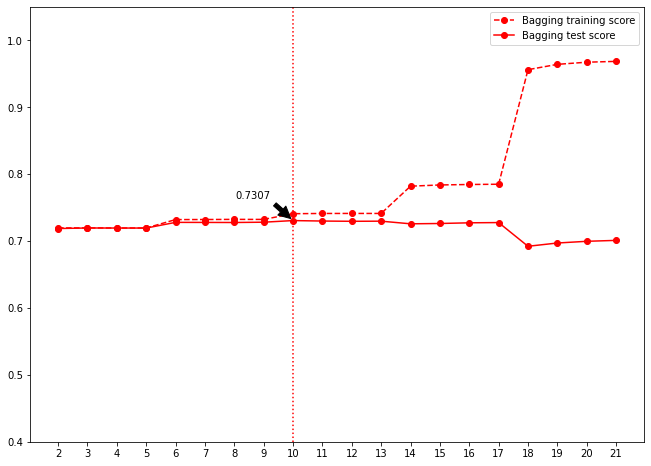

In [56]:
train_bagging_scores = Bagging_GSCV.cv_results_['mean_train_score']
test_bagging_scores = Bagging_GSCV.cv_results_['mean_test_score']

#plt.plot(test_dt_scores, 'go-')
plt.plot(train_bagging_scores, 'ro--')
plt.plot(test_bagging_scores, 'ro-')
plt.ylim(0.4, 1.05)
plt.xticks(range(20), range(2, 22))
plt.legend(["Bagging training score", "Bagging test score"])
plt.axvline(np.argmax(test_bagging_scores), linestyle="dotted", color="red")
plt.annotate(np.max(test_bagging_scores).round(4), (np.argmax(test_bagging_scores), np.max(test_bagging_scores)), xycoords="data",
                 xytext=(-40, 30), textcoords="offset pixels", arrowprops=dict(facecolor="black", shrink=0.1), fontsize=10,
                 horizontalalignment="center", verticalalignment="top")
plt.show()

In [57]:
# accuracy scores
print(Bagging_model.get_params())
print(f"Training Score: {round(Bagging_model.score(X_train, y_train),4)}")
print(f"Testing Score: {round(Bagging_model.score(X_test, y_test),4)}")

{'base_estimator__ccp_alpha': 0.0, 'base_estimator__class_weight': None, 'base_estimator__criterion': 'gini', 'base_estimator__max_depth': 8, 'base_estimator__max_features': None, 'base_estimator__max_leaf_nodes': None, 'base_estimator__min_impurity_decrease': 0.0, 'base_estimator__min_impurity_split': None, 'base_estimator__min_samples_leaf': 1, 'base_estimator__min_samples_split': 2, 'base_estimator__min_weight_fraction_leaf': 0.0, 'base_estimator__presort': 'deprecated', 'base_estimator__random_state': None, 'base_estimator__splitter': 'best', 'base_estimator': DecisionTreeClassifier(max_depth=8), 'bootstrap': True, 'bootstrap_features': False, 'max_features': 1.0, 'max_samples': 1.0, 'n_estimators': 20, 'n_jobs': None, 'oob_score': False, 'random_state': 8017, 'verbose': 0, 'warm_start': False}
Training Score: 0.7385
Testing Score: 0.7301


### Random Forest Classifier

In [58]:
%%time

# parameters candidates
parameters = {'n_estimators': [20, 50, 100, 200],
              'max_depth':[6,8,12,24,48]}

# fitting
RandomForest_GSCV = GridSearchCV(RandomForestClassifier(random_state=8017), 
                                 parameters, n_jobs=-1, verbose=3)
RandomForest_GSCV.fit(X_train, y_train)
RandomForest_model = RandomForest_GSCV.best_estimator_
RandomForest_model

Fitting 5 folds for each of 20 candidates, totalling 100 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  16 tasks      | elapsed:    7.7s
[Parallel(n_jobs=-1)]: Done 100 out of 100 | elapsed:  2.0min finished


Wall time: 2min 4s


RandomForestClassifier(max_depth=8, random_state=8017)

In [59]:
# accuracy scores
print(RandomForest_model.get_params())
print(f"Training Score: {round(RandomForest_model.score(X_train, y_train),4)}")
print(f"Testing Score: {round(RandomForest_model.score(X_test, y_test),4)}")

{'bootstrap': True, 'ccp_alpha': 0.0, 'class_weight': None, 'criterion': 'gini', 'max_depth': 8, 'max_features': 'auto', 'max_leaf_nodes': None, 'max_samples': None, 'min_impurity_decrease': 0.0, 'min_impurity_split': None, 'min_samples_leaf': 1, 'min_samples_split': 2, 'min_weight_fraction_leaf': 0.0, 'n_estimators': 100, 'n_jobs': None, 'oob_score': False, 'random_state': 8017, 'verbose': 0, 'warm_start': False}
Training Score: 0.7386
Testing Score: 0.732


### Adaboost Classifer

In [60]:
%%time

# parameters candidates
parameters = {'base_estimator__max_depth': [2,3,4,6,8,12],
              'n_estimators': [20, 50, 100, 200]}

# fitting
Adaboost_GSCV = GridSearchCV(AdaBoostClassifier(DecisionTreeClassifier(), random_state=8017), 
                             parameters, n_jobs=-1, verbose=3)
Adaboost_GSCV.fit(X_train, y_train)
Adaboost_model = Adaboost_GSCV.best_estimator_
Adaboost_model

Fitting 5 folds for each of 24 candidates, totalling 120 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  16 tasks      | elapsed:   18.1s
[Parallel(n_jobs=-1)]: Done 120 out of 120 | elapsed:  5.9min finished


Wall time: 5min 53s


AdaBoostClassifier(base_estimator=DecisionTreeClassifier(max_depth=2),
                   n_estimators=20, random_state=8017)

In [61]:
# accuracy scores
print(Adaboost_model.get_params())
print(f"Training Score: {round(Adaboost_model.score(X_train, y_train),4)}")
print(f"Testing Score: {round(Adaboost_model.score(X_test, y_test),4)}")

{'algorithm': 'SAMME.R', 'base_estimator__ccp_alpha': 0.0, 'base_estimator__class_weight': None, 'base_estimator__criterion': 'gini', 'base_estimator__max_depth': 2, 'base_estimator__max_features': None, 'base_estimator__max_leaf_nodes': None, 'base_estimator__min_impurity_decrease': 0.0, 'base_estimator__min_impurity_split': None, 'base_estimator__min_samples_leaf': 1, 'base_estimator__min_samples_split': 2, 'base_estimator__min_weight_fraction_leaf': 0.0, 'base_estimator__presort': 'deprecated', 'base_estimator__random_state': None, 'base_estimator__splitter': 'best', 'base_estimator': DecisionTreeClassifier(max_depth=2), 'learning_rate': 1.0, 'n_estimators': 20, 'random_state': 8017}
Training Score: 0.7311
Testing Score: 0.7316


### Linear Support Vector Classifier

In [62]:

%%time

# parameters candidates
parameters = {'C': np.logspace(-4, 4, 50)}

# fitting
LinearSVC_GSCV = GridSearchCV(LinearSVC(dual=False, random_state=8017), 
                              parameters, n_jobs=-1, verbose=3)
LinearSVC_GSCV.fit(X_train, y_train)
LinearSVC_model = LinearSVC_GSCV.best_estimator_
LinearSVC_model

Fitting 5 folds for each of 50 candidates, totalling 250 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  16 tasks      | elapsed:    1.8s
[Parallel(n_jobs=-1)]: Done 112 tasks      | elapsed:   13.5s
[Parallel(n_jobs=-1)]: Done 250 out of 250 | elapsed:   29.1s finished


Wall time: 29.6 s


LinearSVC(C=0.040949150623804234, dual=False, random_state=8017)

In [63]:
# accuracy scores
print(LinearSVC_model.get_params())
print(f"Training Score: {round(LinearSVC_model.score(X_train, y_train),4)}")
print(f"Testing Score: {round(LinearSVC_model.score(X_test, y_test),4)}")

{'C': 0.040949150623804234, 'class_weight': None, 'dual': False, 'fit_intercept': True, 'intercept_scaling': 1, 'loss': 'squared_hinge', 'max_iter': 1000, 'multi_class': 'ovr', 'penalty': 'l2', 'random_state': 8017, 'tol': 0.0001, 'verbose': 0}
Training Score: 0.7162
Testing Score: 0.7187


### Deep learning approach

### Multilayer Perceptron for Neural Networks

In [64]:
#### Multilayer Perceptron for Neural Networks

# layer sizes candidates
ls = [x for x in [4,8,16,32]] + [x for x in product([2,4,8], [4,8])] + [x for x in product([2,4,8], [8,16], [4,8])]
ls

[4,
 8,
 16,
 32,
 (2, 4),
 (2, 8),
 (4, 4),
 (4, 8),
 (8, 4),
 (8, 8),
 (2, 8, 4),
 (2, 8, 8),
 (2, 16, 4),
 (2, 16, 8),
 (4, 8, 4),
 (4, 8, 8),
 (4, 16, 4),
 (4, 16, 8),
 (8, 8, 4),
 (8, 8, 8),
 (8, 16, 4),
 (8, 16, 8)]

In [65]:
%%time

# parameters candidates
parameters = {'hidden_layer_sizes': ls}

# fitting
MLP_GSCV = GridSearchCV(MLPClassifier(random_state=8017), 
                        parameters, n_jobs=-1, verbose=3)
MLP_GSCV.fit(X_train, y_train)
MLP_model = MLP_GSCV.best_estimator_
MLP_model

Fitting 5 folds for each of 22 candidates, totalling 110 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  16 tasks      | elapsed:   16.0s
[Parallel(n_jobs=-1)]: Done 110 out of 110 | elapsed:  3.3min finished


Wall time: 3min 27s


MLPClassifier(hidden_layer_sizes=(4, 16, 4), random_state=8017)

In [66]:
# top 10 cv scores for the MLP candidates
pd.DataFrame(MLP_GSCV.cv_results_).sort_values('rank_test_score').head(10)

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_hidden_layer_sizes,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score
16,26.946490,3.209079,0.022672,0.004265,"(4, 16, 4)","{'hidden_layer_sizes': (4, 16, 4)}",0.719736,0.720113,0.722165,0.721409,0.715365,0.719757,0.002364,1
8,12.190868,2.661405,0.015558,0.001620,"(8, 4)","{'hidden_layer_sizes': (8, 4)}",0.714259,0.702455,0.698272,0.714043,0.710832,0.707972,0.006467,2
15,25.312688,4.950381,0.019947,0.001545,"(4, 8, 8)","{'hidden_layer_sizes': (4, 8, 8)}",0.695845,0.688574,0.713287,0.716215,0.712532,0.705291,0.010994,3
9,18.885661,7.443294,0.016489,0.000581,"(8, 8)","{'hidden_layer_sizes': (8, 8)}",0.685175,0.723041,0.709793,0.712437,0.695722,0.705234,0.013286,4
3,9.299862,3.162947,0.041513,0.017075,32,{'hidden_layer_sizes': 32},0.717186,0.683192,0.712060,0.699594,0.694966,0.701400,0.012157,5
2,7.628864,1.622753,0.019146,0.006064,16,{'hidden_layer_sizes': 16},0.714920,0.637205,0.712626,0.705449,0.697988,0.693638,0.028833,6
7,16.460438,8.746942,0.016157,0.001163,"(4, 8)","{'hidden_layer_sizes': (4, 8)}",0.639849,0.684797,0.719992,0.712249,0.697139,0.690805,0.028229,7
20,20.664302,5.204737,0.023063,0.006344,"(8, 16, 4)","{'hidden_layer_sizes': (8, 16, 4)}",0.665345,0.675071,0.687978,0.706866,0.690245,0.685101,0.014138,8
17,22.949056,6.198688,0.025930,0.001260,"(4, 16, 8)","{'hidden_layer_sizes': (4, 16, 8)}",0.699528,0.705571,0.607801,0.707716,0.701483,0.684420,0.038419,9
6,45.933047,18.474095,0.016954,0.002273,"(4, 4)","{'hidden_layer_sizes': (4, 4)}",0.723135,0.699150,0.582491,0.709227,0.706960,0.684193,0.051436,10


In [67]:
# scores
print(MLP_model)
print(f"Training Score: {round(MLP_model.score(X_train, y_train),4)}")
print(f"Testing Score: {round(MLP_model.score(X_test, y_test),4)}")

MLPClassifier(hidden_layer_sizes=(4, 16, 4), random_state=8017)
Training Score: 0.7171
Testing Score: 0.7205


In [68]:
####Comparing all models

# accuracy scores of all models
result = pd.DataFrame({'Model':['Decision Tree','Logistic',
                                'Bagging','Random Forest','Adaboost',
                                'Linear SVC','MLP'],
                       'Prediction Accuracy': [DecisionTree_model.score(X_test, y_test),
                                               Logistic_model.score(X_test, y_test),
                                               Bagging_model.score(X_test, y_test),
                                               RandomForest_model.score(X_test, y_test),
                                               Adaboost_model.score(X_test, y_test),
                                               LinearSVC_model.score(X_test, y_test),
                                              MLP_model.score(X_test, y_test)]}
                     )
result.sort_values('Prediction Accuracy', ascending=False)

,Model,Prediction Accuracy
3,Random Forest,0.732039
4,Adaboost,0.731586
2,Bagging,0.730075
0,Decision Tree,0.724107
6,MLP,0.720480
1,Logistic,0.719272
5,Linear SVC,0.718667


### Testing and Evaluation

### Classification Reports and Confusion Matrix

In [69]:
####Classification Reports and Confusion Matrix

def plot_confusion_matrix(classifier, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    pred_train = classifier.predict_proba(X_train)
    pred_test = classifier.predict_proba(X_test)
    acc_train = accuracy_score(y_train, np.argmax(pred_train, 1))
    acc_test = accuracy_score(y_test, np.argmax(pred_test, 1))

    print("Training ACC:", round(acc_train, 4), "Testing ACC:", round(acc_test, 4))
    cm = confusion_matrix(y_test, np.argmax(pred_test, 1))
    print("Confusion matrix: \n", cm)
    print("Testing:\n",classification_report(y_test, np.argmax(pred_test, 1), target_names=classes))

    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.ylabel('True label')
    plt.xlabel('Predicted label')
    plt.tight_layout()

Training ACC: 0.7386 Testing ACC: 0.732
Confusion matrix: 
 [[5101 1366]
 [2181 4589]]
Testing:
               precision    recall  f1-score   support

          No       0.70      0.79      0.74      6467
         Yes       0.77      0.68      0.72      6770

    accuracy                           0.73     13237
   macro avg       0.74      0.73      0.73     13237
weighted avg       0.74      0.73      0.73     13237

Confusion matrix, without normalization


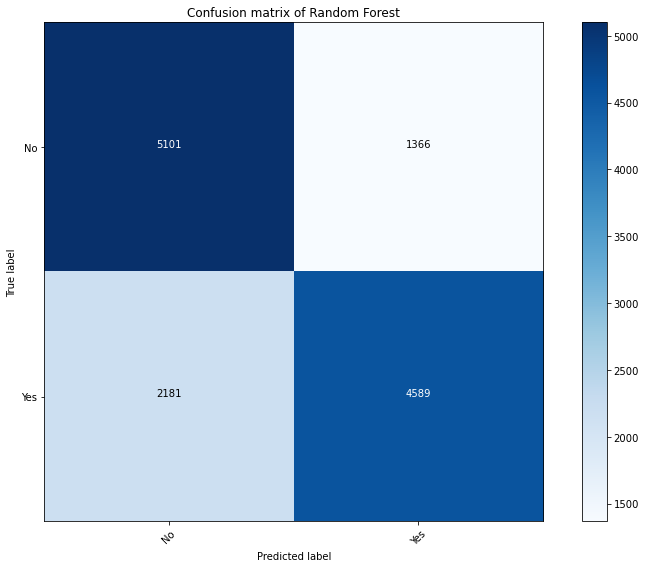

In [70]:
plot_confusion_matrix(RandomForest_model, classes=['No','Yes'],
                      title='Confusion matrix of Random Forest')

Training ACC: 0.7331 Testing ACC: 0.7241
Confusion matrix: 
 [[4972 1495]
 [2157 4613]]
Testing:
               precision    recall  f1-score   support

          No       0.70      0.77      0.73      6467
         Yes       0.76      0.68      0.72      6770

    accuracy                           0.72     13237
   macro avg       0.73      0.73      0.72     13237
weighted avg       0.73      0.72      0.72     13237

Confusion matrix, without normalization


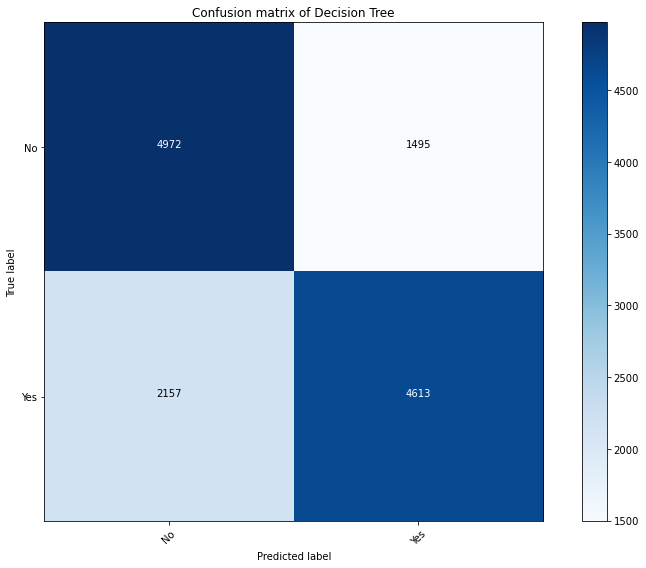

In [71]:
plot_confusion_matrix(DecisionTree_model, classes=['No','Yes'],
                      title='Confusion matrix of Decision Tree')

Training ACC: 0.7173 Testing ACC: 0.7193
Confusion matrix: 
 [[5228 1239]
 [2477 4293]]
Testing:
               precision    recall  f1-score   support

          No       0.68      0.81      0.74      6467
         Yes       0.78      0.63      0.70      6770

    accuracy                           0.72     13237
   macro avg       0.73      0.72      0.72     13237
weighted avg       0.73      0.72      0.72     13237

Confusion matrix, without normalization


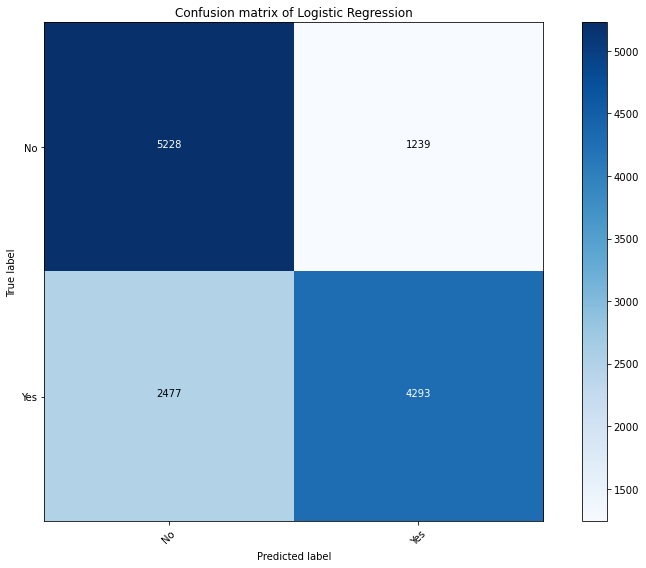

In [72]:
plot_confusion_matrix(Logistic_model, classes=['No','Yes'],
                      title='Confusion matrix of Logistic Regression')

In [73]:
yy_test = label_binarize(y_test, classes=[0, 1])
plt.figure(figsize=(20, 20))
def plot_roc_curve(classifier, label):
    # Compute ROC curve and ROC area for each class
    fpr = []
    tpr = []
    roc_auc = []
    pred_test = classifier.predict_proba(X_test)
    fpr, tpr, _ = roc_curve(yy_test, pred_test[:, 1])
    roc_auc = auc(fpr, tpr)
    
    plt.plot(fpr, tpr, label=label+(' (area = %0.4f)' % roc_auc))
def show_roc_curve():
    plt.plot([0, 1], [0, 1], 'k--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('ROC curve')
    plt.legend(loc="lower right")
    plt.show()

<Figure size 1440x1440 with 0 Axes>

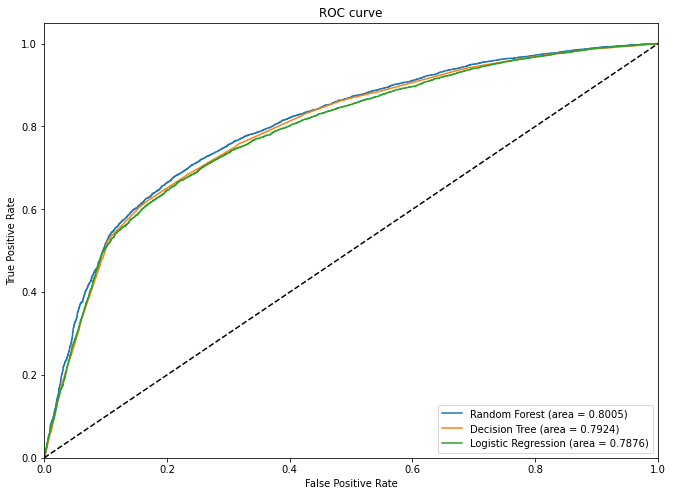

In [74]:
plot_roc_curve(RandomForest_model, label='Random Forest')
plot_roc_curve(DecisionTree_model, label='Decision Tree')
plot_roc_curve(Logistic_model, label='Logistic Regression')
show_roc_curve()

Random forest had the overall best prediction and with this acuracy it can help clinican or physician in detecting and diagnosing heart failure